In [ ]:
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [3]:
# Import data
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [4]:
# Get categorical data mapping
sex_map = [(val, ind) for ind, val in enumerate(dataset['sex'].unique())]
smoker_map = [(val, ind) for ind, val in enumerate(dataset['smoker'].unique())]
region_map = [(val, ind) for ind, val in enumerate(dataset['region'].unique())]

In [5]:
# Convert categorical data to numeric
dataset['sex'] = dataset['sex'].apply(dict(sex_map).get)
dataset['smoker'] = dataset['smoker'].apply(dict(smoker_map).get)
dataset['region'] = dataset['region'].apply(dict(region_map).get)

In [6]:
# Split train and test dataset
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# Create train and test labels
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')
train_dataset.head()

,age,sex,bmi,children,smoker,region
578,52,1,30.2,1,1,0
610,47,0,29.4,1,1,1
569,48,1,40.6,2,0,2
1034,61,1,38.4,0,1,2
198,51,0,18.1,0,1,2


In [7]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1070.0,39.036449,14.142122,18.0,26.0,39.0,51.0,64.0
sex,1070.0,0.498131,0.500230,0.0,0.0,0.0,1.0,1.0
bmi,1070.0,30.737290,6.065193,16.0,26.3,30.5,34.8,53.1
children,1070.0,1.093458,1.211364,0.0,0.0,1.0,2.0,5.0
smoker,1070.0,0.800935,0.399484,0.0,1.0,1.0,1.0,1.0
region,1070.0,1.498131,1.103399,0.0,1.0,1.0,2.0,3.0


In [8]:
# Create model
model = keras.Sequential([layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(1)
                          ])

model.compile(loss='mean_absolute_error',
              optimizer=keras.optimizers.Adam(0.001),
              metrics=[ 'mae', 'mse']
              )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Train model
history = model.fit(train_dataset,
                    train_labels,
                    validation_split=0.2,
                    verbose=0,
                    epochs=1000
                    )

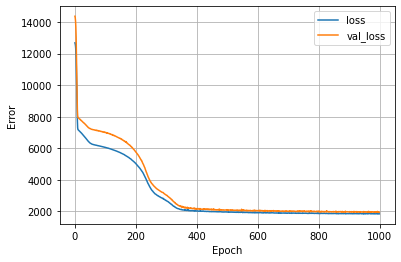

In [10]:
# Plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [11]:
# Evaluate model
test_results = model.evaluate(test_dataset, test_labels, verbose=0)
print(test_results[1])

2544.223388671875


In [12]:
predictions = model.predict(test_dataset).flatten()
print("Predicted expense: {}".format(predictions[30]))
print("Actual expense: {}".format(test_labels.iloc[30]))

Predicted expense: 12813.3251953125
Actual expense: 12815.44


9/9 - 0s - loss: 2544.2234 - mae: 2544.2234 - mse: 34463716.0000
Testing set Mean Abs Error: 2544.22 expenses
You passed the challenge. Great job!


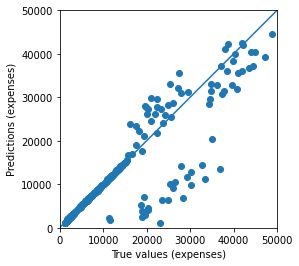

In [13]:
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)